In [22]:
import pandas as pd
from IPython.display import display

data_base = '/Users/drjosefhartmann/Development/Accidents/may24_bmlops_accidents/airflow/Volumes/data'

X_train = pd.read_csv(data_base + '/preprocessed/X_train.csv')
display(X_train.head()  )
print(  X_train.info())
options = list(X_train['catu'].unique())
options.sort()
print(options, type(options))
print(options.index(1))
idx = options.index(1)

,place,catu,sexe,secu1,year_acc,victim_age,catv,obsm,motor,catr,...,com,agg_,int,atm,col,lat,long,hour,nb_victim,nb_vehicules
0,10,3,2,0.0,2021,19.0,2.0,1.0,1.0,4,...,59350,2,2,0.0,6.0,50.632593,3.052206,22,4,1
1,1,1,1,2.0,2021,78.0,1.0,2.0,1.0,3,...,58194,2,4,0.0,2.0,46.988500,3.166300,8,2,2
2,1,1,1,1.0,2021,42.0,2.0,0.0,1.0,3,...,80131,1,1,0.0,7.0,49.851600,2.404200,21,1,1
3,1,1,1,2.0,2021,55.0,1.0,6.0,1.0,3,...,73081,1,1,0.0,6.0,45.691148,6.111960,6,2,2
4,1,1,2,1.0,2021,32.0,2.0,2.0,1.0,3,...,34113,1,1,1.0,1.0,43.511425,3.724397,8,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38288 entries, 0 to 38287
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   place         38288 non-null  int64  
 1   catu          38288 non-null  int64  
 2   sexe          38288 non-null  int64  
 3   secu1         38288 non-null  float64
 4   year_acc      38288 non-null  int64  
 5   victim_age    38288 non-null  float64
 6   catv          38288 non-null  float64
 7   obsm          38288 non-null  float64
 8   motor         38288 non-null  float64
 9   catr          38288 non-null  int64  
 10  circ          38288 non-null  float64
 11  surf          38288 non-null  float64
 12  situ          38288 non-null  float64
 13  vma           38288 non-null  float64
 14  jour          38288 non-null  int64  
 15  mois          38288 non-null  int64  
 16  lum           38288 non-null  int64  
 17  dep           38288 non-null  int64  
 18  com           38288 non-nu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


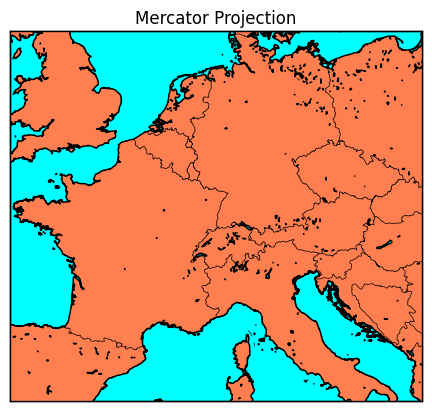

In [19]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=55,\
            llcrnrlon=-5,urcrnrlon=20,lat_ts=20,resolution='f')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries()
m.drawcounties()
# draw parallels and meridians.
m.drawparallels(np.arange(-5.,0.,5.))
m.drawmeridians(np.arange(-5,0,5))
m.drawmapboundary(fill_color='aqua') 
plt.title("Mercator Projection")
plt.show()


In [26]:
X_train['com'].value_counts(ascending=False)

com
75116    346
75112    300
97302    273
75119    257
75115    254
        ... 
97124      1
56252      1
77506      1
69208      1
57071      1
Name: count, Length: 8808, dtype: int64

In [35]:
X_train.groupby('com').agg({'long': 'count', 'lat': 'count'}).sort_values(by='long', ascending=False)

,long,lat
com,,
75116,346,346
75112,300,300
97302,273,273
75119,257,257
75115,254,254
...,...,...
57516,1,1
57498,1,1
57497,1,1


In [40]:
X_train.loc[X_train['com'] == 75116, ['long', 'lat']]

,long,lat
165,2.263554,48.861098
203,2.254875,48.846575
348,2.268159,48.865873
366,2.265310,48.858344
447,2.239431,48.863551
...,...,...
37888,2.298249,48.869674
37955,2.285430,48.855977
38015,2.294139,48.873726
38081,2.265016,48.840702
